In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
#Importing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
image_vector_size = 28*28
#Normalization
x_train = x_train.astype(float)/255
x_test = x_test.astype(float)/255

x_test = x_test.reshape(x_test.shape[0], image_vector_size)

In [2]:
test_examples = 1000
print(x_test[0:test_examples,:].shape)

(1000, 784)


      Dim_1      Dim_2  label
0 -4.371839   4.496045      7
1  3.106890 -12.424010      2
2 -6.981419  -4.848914      1
3  8.093211  -1.087673      0
4  1.596688   7.023412      4


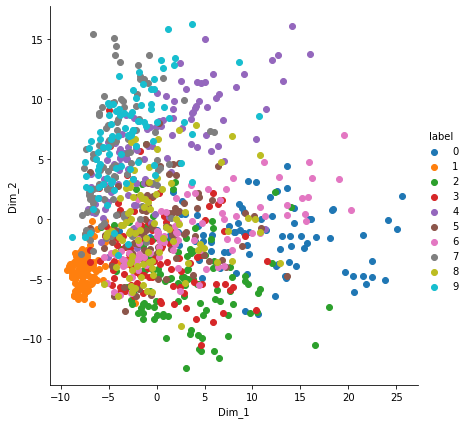

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_test[0:test_examples,:])
scaled_data = scaler.transform(x_test[0:test_examples,:])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
import pandas as pd
data = {"Dim_1": x_pca[:,0],
       "Dim_2": x_pca[:,1],
       "label": y_test[0:test_examples]}
df = pd.DataFrame(data)
print(df.head())
import seaborn as sns
sns.FacetGrid(df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

<IPython.core.display.Javascript object>


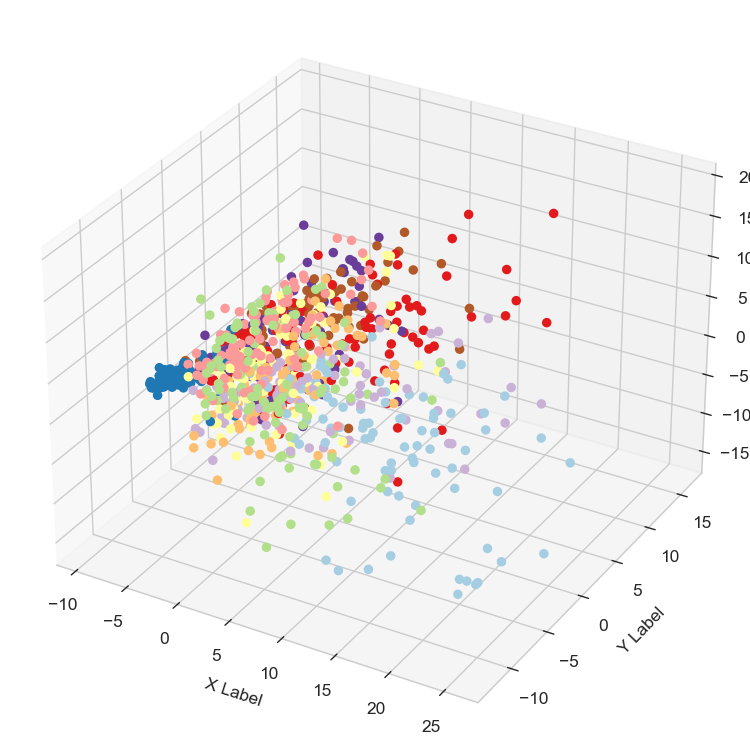

In [5]:
%matplotlib notebook


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_test[0:test_examples,:])
scaled_data = scaler.transform(x_test[0:test_examples,:])
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
import seaborn as sns, numpy as np, pandas as pd, random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
g = ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2] ,
               c=df["label"] ,
               marker='o' ,
               depthshade=False ,
              cmap="Paired")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# produce a legend with the unique colors from the scatter
legend = ax.legend(*g.legend_elements(), loc="best", title="Map", borderaxespad=-10, ncol=4)
ax.add_artist(legend)
plt.show()

       Dim_1      Dim_2  label
0 -18.606462  14.875252      7
1   1.345067 -22.745298      2
2 -19.393208 -12.071775      1
3  20.276009 -38.942146      0
4   1.391197  45.132820      4


<IPython.core.display.Javascript object>


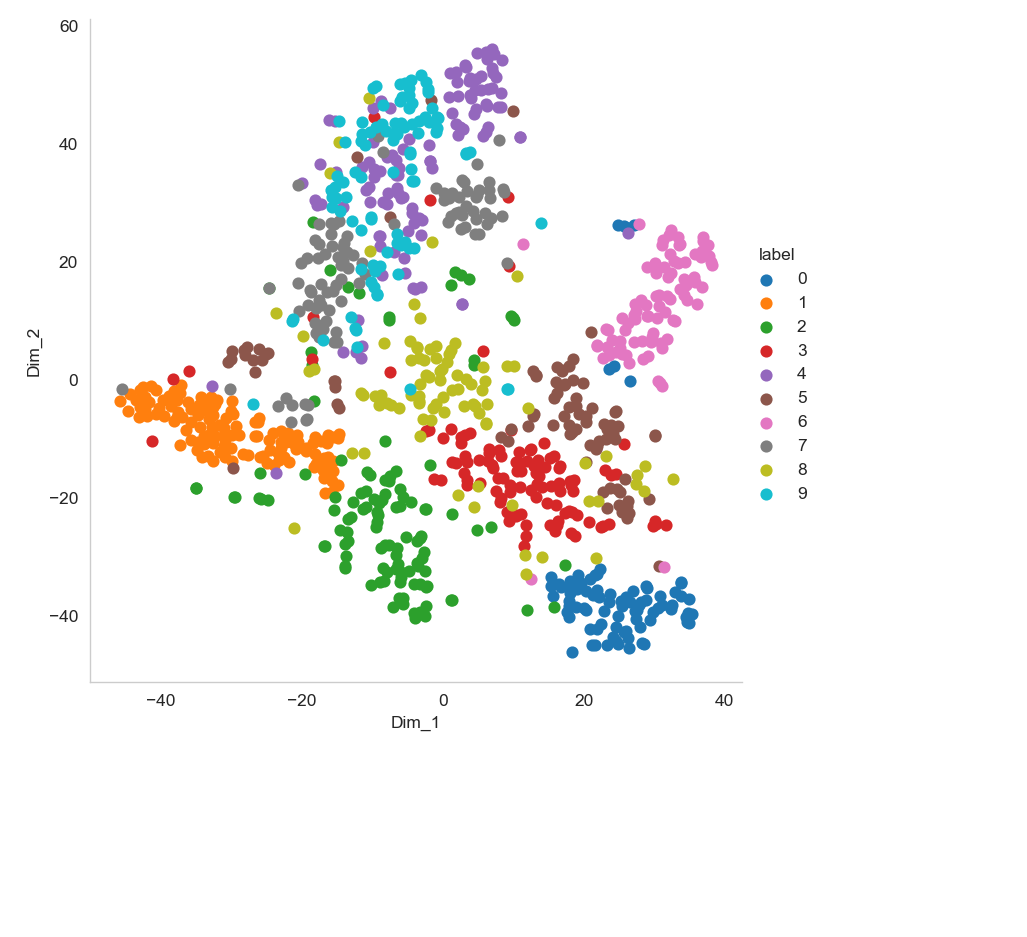

In [6]:
from sklearn.manifold import TSNE
import time
time_start = time.time()
x_tsne = TSNE(random_state=123).fit_transform(x_test[0:test_examples,:])
data = {"Dim_1":x_tsne[:,0] ,
       "Dim_2": x_tsne[:,1] ,
       "label": y_test[0:test_examples]}
df = pd.DataFrame(data)
print(df.head())
import seaborn as sns
sns.FacetGrid(df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

<IPython.core.display.Javascript object>


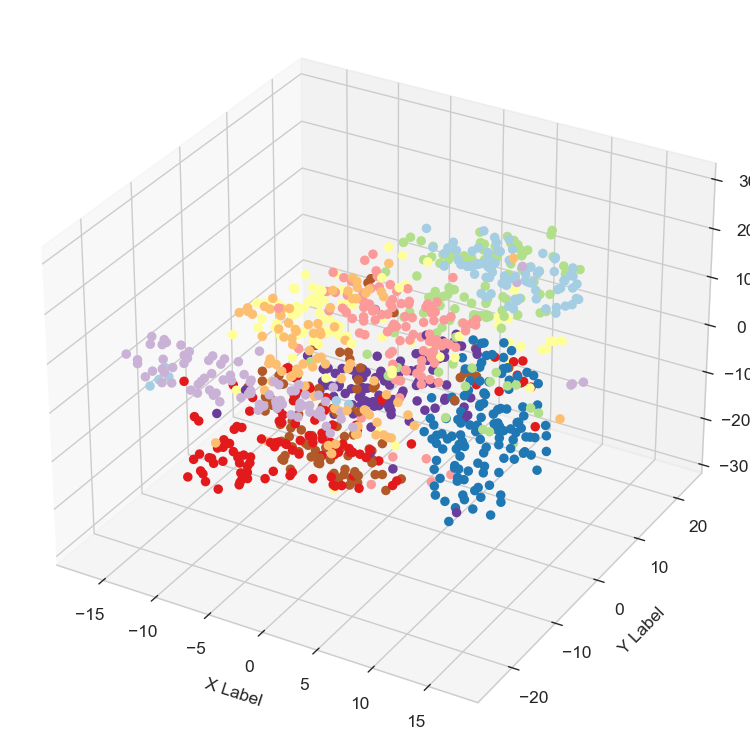

In [7]:
from sklearn.manifold import TSNE
import time
time_start = time.time()
x_tsne = TSNE(n_components=3,random_state=123).fit_transform(x_test[0:test_examples,:])
import seaborn as sns, numpy as np, pandas as pd, random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
g = ax.scatter(x_tsne[:,0],x_tsne[:,1],x_tsne[:,2] ,
               c=df["label"] ,
               marker='o' ,
               depthshade=False ,
              cmap="Paired")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# produce a legend with the unique colors from the scatter
legend = ax.legend(*g.legend_elements(), loc="best", title="Map", borderaxespad=-10, ncol=4)
ax.add_artist(legend)
plt.show()